<a href="https://www.kaggle.com/code/stutiiikatariaaa/automaticmusicgeneration?scriptVersionId=269753279" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Downloading required packages

In [1]:
!pip install pretty_midi
!apt-get update
!apt-get install -y lilypond

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 58.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 3.9 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.11-py3-none-any.whl size=5595886 sha256=62ba82575441979e74e774007c4b2016a273dd952c417b4c751b12af11322e79
  Stored in directory: /root/.cache/pip/wheels/09/e6/e6/29223dbea25e71e517b8791bf35cc9a7b872cb2ad284e30181
Successfully built pretty_midi
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,085 kB]
Get:7 http://a

# Importing necessary libraries and packages

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

from typing import Dict, List, Optional, Sequence, Tuple
import collections
import datetime
import glob
import numpy as np
import pathlib
import pandas as pd
import pretty_midi

from IPython import display
from matplotlib import pyplot as plt
import seaborn as sns

from IPython.display import Audio, display, Image
!apt-get install -y fluidsynth
import os
from music21 import converter, instrument, note, chord, stream, environment
env = environment.Environment()
env['lilypondPath'] = '/usr/bin/lilypond' 
env.write()
import soundfile as sf

2025-10-21 16:15:59.436919: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761063359.614956      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761063359.670895      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered





The following additional packages will be installed:
  fluid-soundfont-gm libevdev2 libfluidsynth3 libgudev-1.0-0 libinput-bin
  libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a libqt5dbus5
  libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libxcb-icccm4 libxcb-image0 libxcb-keysyms1
  libxcb-render-util0 libxcb-util1 libxcb-xinerama0 libxcb-xinput0 libxcb-xkb1
  libxkbcommon-x11-0 qsynth qt5-gtk-platformtheme qttranslations5-l10n
  timgm6mb-soundfont
Suggested packages:
  fluid-soundfont-gs qt5-image-formats-plugins qtwayland5 jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libevdev2 libfluidsynth3 libgudev-1.0-0
  libinput-bin libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a
  libqt5dbus5 libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libxcb-icccm4 libxcb-image0 libxcb-keysyms1
  libxcb-render-util0 libxcb-util1 libxcb-xinerama0 li

Initialising random seed and sampling rate

In [3]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

_SAMPLING_RATE = 16000

# Dataset loading 

In [4]:
base_path = "/kaggle/input/classical-music-midi/"
composers = ["chopin", "mozart", "bach", "borodin"]
all_midis = []

Parsing and loading the midi files of few composer's files

In [5]:
for composer in composers:
    composer_path = os.path.join(base_path, composer)
    if os.path.exists(composer_path):
        for file in os.listdir(composer_path):
            if file.endswith(".mid"): 
                file_path = os.path.join(composer_path, file)
                try:
                    midi = converter.parse(file_path)
                    all_midis.append((composer, file, midi)) 
                    print(f"Loaded: {composer}/{file}")
                except Exception as e:
                    print(f"Error loading {composer}/{file}: {e}")
    else:
        print(f"Directory for {composer} not found at {composer_path}")

print(f"Total MIDI files loaded: {len(all_midis)}")

/usr/local/lib/python3.11/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 2002 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(


Loaded: chopin/chpn-p13.mid


/usr/local/lib/python3.11/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 2003 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(


Loaded: chopin/chpn_op66.mid


/usr/local/lib/python3.11/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'Copyright \xa9 2002 by Bernd Kr\xfcger'>; getting generic Instrument
  warnings.warn(


Loaded: chopin/chpn_op35_1.mid


/usr/local/lib/python3.11/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 1997 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(


Loaded: chopin/chpn-p10.mid
Loaded: chopin/chpn_op23.mid
Loaded: chopin/chpn-p4.mid
Loaded: chopin/chpn-p2.mid
Loaded: chopin/chpn_op25_e2.mid
Loaded: chopin/chpn_op35_2.mid
Loaded: chopin/chpn_op27_2.mid
Loaded: chopin/chpn-p7.mid
Loaded: chopin/chpn_op33_4.mid
Loaded: chopin/chpn-p1.mid


/usr/local/lib/python3.11/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'Copyright \xa9 1997 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(


Loaded: chopin/chpn-p8.mid
Loaded: chopin/chpn-p17.mid


/usr/local/lib/python3.11/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Et\xfcde Opus 10 No. 5'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Schwarze-Tasten-Et\xfcde'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 1999 by Bernd Kr\xfcger'>; getting generic Instrument
  warnings.warn(


Loaded: chopin/chpn_op10_e05.mid
Loaded: chopin/chpn-p11.mid
Loaded: chopin/chpn_op27_1.mid
Loaded: chopin/chpn_op33_2.mid
Loaded: chopin/chpn-p18.mid
Loaded: chopin/chpn-p15.mid


/usr/local/lib/python3.11/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Et\xfcde Opus 25, No. 11'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Sturmet\xfcde'>; getting generic Instrument
  warnings.warn(


Loaded: chopin/chpn_op25_e11.mid
Loaded: chopin/chpn-p6.mid
Loaded: chopin/chpn_op10_e01.mid


/usr/local/lib/python3.11/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'Copyright \xa9 2002 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(


Loaded: chopin/chpn_op25_e1.mid
Loaded: chopin/chpn-p12.mid
Loaded: chopin/chpn-p20.mid
Loaded: chopin/chpn-p9.mid
Loaded: chopin/chpn-p14.mid
Loaded: chopin/chpn-p24.mid
Loaded: chopin/chpn-p5.mid
Loaded: chopin/chpn_op25_e12.mid
Loaded: chopin/chpn_op25_e4.mid
Loaded: chopin/chpn_op53.mid
Loaded: chopin/chpn_op25_e3.mid
Loaded: chopin/chpn-p16.mid
Loaded: chopin/chpn-p23.mid


/usr/local/lib/python3.11/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Et\xfcde Nr. 12'>; getting generic Instrument
  warnings.warn(


Loaded: chopin/chpn_op10_e12.mid


/usr/local/lib/python3.11/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 2002 by Bernd Kr\xfcger'>; getting generic Instrument
  warnings.warn(


Loaded: chopin/chpn_op35_4.mid
Loaded: chopin/chpn-p19.mid
Loaded: chopin/chpn-p3.mid
Loaded: chopin/chpn_op7_1.mid
Loaded: chopin/chpn-p22.mid
Loaded: chopin/chpn_op35_3.mid


/usr/local/lib/python3.11/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 1997 by Bernd Kr\xfcger'>; getting generic Instrument
  warnings.warn(


Loaded: chopin/chp_op31.mid
Loaded: chopin/chp_op18.mid
Loaded: chopin/chpn-p21.mid
Loaded: chopin/chpn_op7_2.mid


/usr/local/lib/python3.11/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'Copyright \xa9 1997 by Bernd Kr\xfcger'>; getting generic Instrument
  warnings.warn(


Loaded: mozart/mz_330_2.mid


/usr/local/lib/python3.11/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'Copyright \xa9 2006 by Bernd Kr\xfcger'>; getting generic Instrument
  warnings.warn(


Loaded: mozart/mz_311_3.mid


/usr/local/lib/python3.11/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'Copyright \xa9 2006 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(


Loaded: mozart/mz_545_3.mid
Loaded: mozart/mz_332_3.mid
Loaded: mozart/mz_570_2.mid
Loaded: mozart/mz_333_3.mid
Loaded: mozart/mz_311_2.mid


/usr/local/lib/python3.11/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'Copyright \xa9 2005 by Bernd Kr\xfcger'>; getting generic Instrument
  warnings.warn(


Loaded: mozart/mz_331_3.mid
Loaded: mozart/mz_330_1.mid
Loaded: mozart/mz_570_1.mid
Loaded: mozart/mz_311_1.mid
Loaded: mozart/mz_570_3.mid
Loaded: mozart/mz_545_2.mid
Loaded: mozart/mz_332_2.mid
Loaded: mozart/mz_330_3.mid
Loaded: mozart/mz_333_2.mid
Loaded: mozart/mz_545_1.mid
Loaded: mozart/mz_332_1.mid
Loaded: mozart/mz_333_1.mid
Loaded: mozart/mz_331_2.mid
Loaded: mozart/mz_331_1.mid


/usr/local/lib/python3.11/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=7, channel=None, data=b'Copyright 2004 by Bernd Kr\xfcger.'>; getting generic Instrument
  warnings.warn(


Loaded: bach/bach_847.mid


/usr/local/lib/python3.11/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Pr\xe4ludium und Fuge in D-Dur, BWV 850'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=8, channel=None, data=b'Copyright 1997 by Bernd Kr\xfcger.'>; getting generic Instrument
  warnings.warn(


Loaded: bach/bach_850.mid


/usr/local/lib/python3.11/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=8, channel=None, data=b'Copyright 2004 by Bernd Kr\xfcger.'>; getting generic Instrument
  warnings.warn(


Loaded: bach/bach_846.mid


/usr/local/lib/python3.11/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 2000 by Bernd Kr\xfcger'>; getting generic Instrument
  warnings.warn(


Loaded: borodin/bor_ps5.mid
Loaded: borodin/bor_ps6.mid
Loaded: borodin/bor_ps2.mid
Loaded: borodin/bor_ps1.mid
Loaded: borodin/bor_ps4.mid
Loaded: borodin/bor_ps7.mid
Loaded: borodin/bor_ps3.mid
Total MIDI files loaded: 79


Extract notes, chords, and rests from a MIDI stream

In [6]:
def extract_notes(midi_stream):
    notes = []
    try:
        songs = instrument.partitionByInstrument(midi_stream)
        
        if songs:  
            for part in songs.parts:
                pick = part.recurse()
                for element in pick:
                    if isinstance(element, note.Note):
                        notes.append(f"{element.pitch}:{element.duration.quarterLength}")
                    elif isinstance(element, chord.Chord):
                        # Using pitch classes (0-11) for chord representation
                        chord_notes = ".".join(str(n.pitchClass) for n in element.pitches)
                        notes.append(f"chord_{chord_notes}:{element.duration.quarterLength}")
                    elif isinstance(element, note.Rest):
                        notes.append(f"rest:{element.duration.quarterLength}")
        else:  
            for element in midi_stream.flat:
                if isinstance(element, note.Note):
                    notes.append(f"{element.pitch}:{element.duration.quarterLength}")
                elif isinstance(element, chord.Chord):
                    chord_notes = ".".join(str(n.pitchClass) for n in element.pitches)
                    notes.append(f"chord_{chord_notes}:{element.duration.quarterLength}")
                elif isinstance(element, note.Rest):
                    notes.append(f"rest:{element.duration.quarterLength}")
                    
    except Exception as e:
        print(f"Error processing MIDI stream: {e}")
        # For debugging, you might want to see more details:
        import traceback
        print(f"Detailed error: {traceback.format_exc()}")
    
    return notes

# Process files with better error handling
Corpus = []
successful_files = 0

for i, (composer, filename, midi) in enumerate(all_midis):
    print(f"Processing {i+1}/{len(all_midis)}: {composer}/{filename}")
    try:
        notes = extract_notes(midi)
        if notes:
            Corpus.extend(notes)
            successful_files += 1
            print(f"  ✓ Extracted {len(notes)} notes")
        else:
            print(f"  ⚠ No notes extracted")
    except Exception as e:
        print(f"  ✗ Error: {e}")

print(f"\nProcessing complete:")
print(f"Successfully processed: {successful_files}/{len(all_midis)} files")
print(f"Total notes and chords in the dataset: {len(Corpus)}")
if Corpus:
    print(f"Unique musical elements: {len(set(Corpus))}")
    print("Sample elements:", Corpus[:5])

Processing 1/79: chopin/chpn-p13.mid
  ✓ Extracted 752 notes
Processing 2/79: chopin/chpn_op66.mid
  ✓ Extracted 3153 notes
Processing 3/79: chopin/chpn_op35_1.mid
  ✓ Extracted 3846 notes
Processing 4/79: chopin/chpn-p10.mid
  ✓ Extracted 301 notes
Processing 5/79: chopin/chpn_op23.mid
  ✓ Extracted 4601 notes
Processing 6/79: chopin/chpn-p4.mid
  ✓ Extracted 274 notes
Processing 7/79: chopin/chpn-p2.mid
  ✓ Extracted 259 notes
Processing 8/79: chopin/chpn_op25_e2.mid
  ✓ Extracted 890 notes
Processing 9/79: chopin/chpn_op35_2.mid
  ✓ Extracted 3741 notes
Processing 10/79: chopin/chpn_op27_2.mid
  ✓ Extracted 1531 notes
Processing 11/79: chopin/chpn-p7.mid
  ✓ Extracted 102 notes
Processing 12/79: chopin/chpn_op33_4.mid
  ✓ Extracted 1781 notes
Processing 13/79: chopin/chpn-p1.mid
  ✓ Extracted 442 notes
Processing 14/79: chopin/chpn-p8.mid
  ✓ Extracted 1436 notes
Processing 15/79: chopin/chpn-p17.mid
  ✓ Extracted 1167 notes
Processing 16/79: chopin/chpn_op10_e05.mid
  ✓ Extracted 1

In [7]:
print("First fifty values in the Corpus:", Corpus[:50])

First fifty values in the Corpus: ['chord_1.6.10:3.0', 'F#2:0.5', 'F3:0.5', 'G#3:0.5', 'F#3:0.5', 'B-3:0.5', 'C#3:0.5', 'chord_6.1.10:3.0', 'F#2:0.5', 'F3:0.5', 'G#3:0.5', 'F#3:0.5', 'B-3:0.5', 'C#3:0.5', 'chord_1.10.6:3.0', 'rest:3.0', 'F#2:0.5', 'F3:0.5', 'G#3:0.5', 'F#3:0.5', 'B-3:0.5', 'C#3:0.5', 'F4:3.0', 'B4:2.0', 'C#2:0.5', 'G3:0.5', 'B-3:0.5', 'G#3:0.5', 'G#4:1.0', 'B3:0.5', 'C#3:0.5', 'chord_6.10.1:3.0', 'rest:3.0', 'F#2:0.5', 'F3:0.5', 'G#3:0.5', 'F#3:0.5', 'B-3:0.5', 'C#3:0.5', 'C#4:3.0', 'chord_6.10:2.0', 'F#2:0.5', 'F3:0.5', 'G#3:0.5', 'F#3:0.5', 'chord_10.6:1.0', 'B-3:0.5', 'C#3:0.5', 'C#4:3.0', 'chord_10.6:2/3']


Creating Musical notes from an input MIDI file 


Changing working directory to: `/tmp/music21'
Processing `/tmp/music21/tmp1_fduj3h.ly'
Parsing...
Interpreting music...[8]
Preprocessing graphical objects...
Calculating line breaks... 
Drawing systems... 
Layout output to `tmp1_fduj3h.ly.eps'...
Converting to PNG...
Layout output to `tmp1_fduj3h.ly-1.eps'...
Layout output to `tmp1_fduj3h.ly-2.eps'...
Layout output to `tmp1_fduj3h.ly-3.eps'...
Layout output to `tmp1_fduj3h.ly-4.eps'...
Writing tmp1_fduj3h.ly-systems.texi...
Writing tmp1_fduj3h.ly-systems.tex...
Writing tmp1_fduj3h.ly-systems.count...
Success: compilation successfully completed


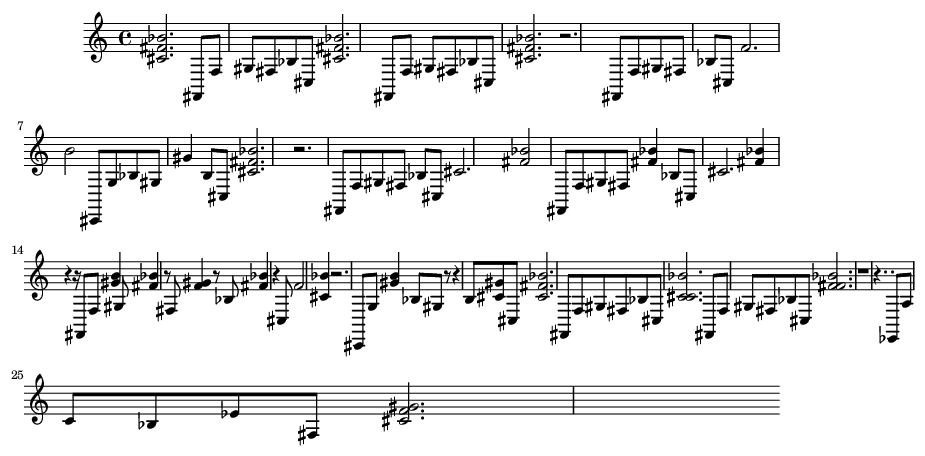

In [8]:
def show(music):
    display(Image(str(music.write("lily.png"))))

def chords_n_notes(Snippet):
    Melody = []
    offset = 0  
    
    for i in Snippet:
        parts = i.split(":")
        if len(parts) != 2:
            print(f"Skipping invalid element: {i}")
            continue
            
        element_str, duration_str = parts
        
        # Handle fraction durations
        if '/' in duration_str:
            try:
                num, denom = map(int, duration_str.split('/'))
                duration = float(num) / denom
            except (ValueError, ZeroDivisionError):
                print(f"Invalid fraction duration: {duration_str}")
                duration = 1.0  # default fallback
        else:
            try:
                duration = float(duration_str)
            except ValueError:
                print(f"Invalid duration: {duration_str}")
                duration = 1.0  # default fallback
        
        # Handle chords (elements starting with "chord_")
        if element_str.startswith("chord_"):
            # Remove "chord_" prefix and split the pitches
            chord_pitches = element_str[6:].split(".")
            notes = []
            for pitch_class in chord_pitches:
                try:
                    # Convert pitch class to MIDI note (C4 = 60)
                    midi_number = 60 + int(pitch_class)
                    note_snip = note.Note(midi_number)
                    notes.append(note_snip)
                except ValueError:
                    print(f"Invalid pitch in chord: {pitch_class}")
                    continue
            
            if notes:
                chord_snip = chord.Chord(notes)
                chord_snip.offset = offset
                chord_snip.duration.quarterLength = duration
                Melody.append(chord_snip)
        
        # Handle rests
        elif element_str == "rest":
            rest_snip = note.Rest()
            rest_snip.offset = offset
            rest_snip.duration.quarterLength = duration
            Melody.append(rest_snip)
        
        # Handle single notes (they have pitch names like "F#2")
        else:
            try:
                note_snip = note.Note(element_str)
                note_snip.offset = offset
                note_snip.duration.quarterLength = duration
                Melody.append(note_snip)
            except:
                print(f"Could not parse note: {element_str}")
                continue
        offset += duration
    
    Melody_midi = stream.Stream(Melody)   
    return Melody_midi

# Test the function
try:
    Melody_Snippet = chords_n_notes(Corpus[:100])
    show(Melody_Snippet)
except Exception as e:
    print(f"Error: {e}")
    import traceback
    traceback.print_exc()

# Create Vocabulary and Mapping Dictionaries

In [9]:
# Create vocabulary from the corpus
vocab = sorted(set(Corpus))
print(f"Vocabulary size: {len(vocab)}")
print("First 10 vocabulary items:")
for i, item in enumerate(vocab[:10]):
    print(f"  {i}: {item}")

# Create mapping dictionaries
element_to_int = {element: i for i, element in enumerate(vocab)}
int_to_element = {i: element for i, element in enumerate(vocab)}

print(f"\nCreated mapping dictionaries with {len(element_to_int)} elements")

# Test the mapping
test_element = Corpus[0]
print(f"\nTest mapping:")
print(f"Original: {test_element}")
print(f"Mapped to: {element_to_int[test_element]}")
print(f"Back to: {int_to_element[element_to_int[test_element]]}")

Vocabulary size: 4478
First 10 vocabulary items:
  0: A1:0.25
  1: A1:0.5
  2: A1:1.0
  3: A1:1.5
  4: A1:1/3
  5: A1:2/3
  6: A1:3.0
  7: A1:4.0
  8: A1:7.0
  9: A1:7/3

Created mapping dictionaries with 4478 elements

Test mapping:
Original: chord_1.6.10:3.0
Mapped to: 1345
Back to: chord_1.6.10:3.0


In [10]:
# Convert the entire corpus to integer sequences
int_corpus = [element_to_int[element] for element in Corpus]
print(f"Total elements in integer corpus: {len(int_corpus)}")
print(f"First 10 integer values: {int_corpus[:10]}")

# Create training sequences and targets
sequence_length = 50  # Number of previous elements to use for prediction
sequences = []
targets = []

for i in range(0, len(int_corpus) - sequence_length):
    sequence = int_corpus[i:i + sequence_length]
    target = int_corpus[i + sequence_length]
    
    sequences.append(sequence)
    targets.append(target)

# Convert to numpy arrays
X = np.array(sequences)
y = np.array(targets)

print(f"\nTraining sequences shape: {X.shape}")
print(f"Targets shape: {y.shape}")
print(f"Number of training samples: {len(X)}")

# Show some examples
print(f"\nFirst sequence (first 5 elements): {X[0][:5]}")
print(f"Corresponding target: {y[0]}")
print(f"Decoded sequence: {[int_to_element[x] for x in X[0][:5]]}")
print(f"Decoded target: {int_to_element[y[0]]}")

Total elements in integer corpus: 161237
First 10 integer values: [1345, 562, 643, 719, 572, 95, 219, 3285, 562, 643]

Training sequences shape: (161187, 50)
Targets shape: (161187,)
Number of training samples: 161187

First sequence (first 5 elements): [1345  562  643  719  572]
Corresponding target: 4437
Decoded sequence: ['chord_1.6.10:3.0', 'F#2:0.5', 'F3:0.5', 'G#3:0.5', 'F#3:0.5']
Decoded target: rest:1.25


# Building LSTM Model for training

In [11]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Model parameters
vocab_size = len(vocab)
embedding_dim = 256
lstm_units = 512
learning_rate = 0.001

print(f"Vocabulary size: {vocab_size}")

# Build the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length),
    LSTM(lstm_units, return_sequences=True),
    Dropout(0.3),
    LSTM(lstm_units),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(vocab_size, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Build the model with a sample input shape
model.build(input_shape=(None, sequence_length))

# Display model architecture
model.summary()

# Calculate the total number of parameters
total_params = model.count_params()
print(f"\nTotal parameters: {total_params:,}")

Vocabulary size: 4478


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1761063644.530624      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 50, 256)        │     1,146,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 50, 512)        │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 512)            │     2,099,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4478)           │     2,297,214 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,380,350 (28.15 MB)

 Trainable params: 7,380,350 (28.15 MB)

 Non-trainable params: 0 (0.00 B)


Total parameters: 7,380,350


In [12]:
# Training parameters
batch_size = 128
epochs = 50
validation_split = 0.1

# Callbacks
checkpoint_callback = ModelCheckpoint(
    'best_music_model.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

print("Starting training...")
print(f"Batch size: {batch_size}")
print(f"Epochs: {epochs}")
print(f"Validation split: {validation_split}")

# Train the model
history = model.fit(
    X, y,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=validation_split,
    callbacks=[checkpoint_callback, early_stopping],
    verbose=1
)

print("Training completed!")

Starting training...
Batch size: 128
Epochs: 50
Validation split: 0.1
Epoch 1/50


I0000 00:00:1761063650.467621    2077 cuda_dnn.cc:529] Loaded cuDNN version 90300


1134/1134 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0964 - loss: 5.8980
Epoch 1: val_loss improved from inf to 5.47035, saving model to best_music_model.h5
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 54s 43ms/step - accuracy: 0.0964 - loss: 5.8978 - val_accuracy: 0.1546 - val_loss: 5.4704
Epoch 2/50
1133/1134 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1270 - loss: 5.1574
Epoch 2: val_loss improved from 5.47035 to 5.35166, saving model to best_music_model.h5
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 48s 42ms/step - accuracy: 0.1271 - loss: 5.1571 - val_accuracy: 0.1302 - val_loss: 5.3517
Epoch 3/50
1133/1134 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.1568 - loss: 4.6861
Epoch 3: val_loss did not improve from 5.35166
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 48s 42ms/step - accuracy: 0.1568 - loss: 4.6859 - val_accuracy: 0.1377 - val_loss: 5.3665
Epoch 4/50
1133/1134 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.1847 - loss: 4.3054
Epoch 4: val_loss did not improve from 5.35166
1134/1134 ━━━━━━━━━━━━━━━━

# Creating Sample music from trained model on LSTM

In [13]:
# Load the best saved model
from tensorflow.keras.models import load_model

model = load_model('best_music_model.h5')
print("Best model loaded successfully!")

# Improved function to generate music with better melody and rhythm
def generate_music(seed_sequence, length=100, temperature=0.7, rest_prob=0.15, chord_prob=0.3):
    """
    Generate music using the trained LSTM model with improved melody and rhythm
    
    Parameters:
    - seed_sequence: starting sequence of musical elements
    - length: number of elements to generate
    - temperature: controls randomness (0.5-0.8 for better coherence)
    - rest_prob: probability to encourage rests for better rhythm
    - chord_prob: probability to encourage chords for harmony
    """
    generated = seed_sequence.copy()
    
    for i in range(length):
        # Prepare the input sequence
        input_seq = generated[-sequence_length:]
        input_seq_int = [element_to_int[element] for element in input_seq]
        input_seq_array = np.array([input_seq_int])
        
        # Get predictions from model
        predictions = model.predict(input_seq_array, verbose=0)[0]
        
        # Apply temperature with smoothing to avoid extreme values
        predictions = np.log(predictions + 1e-8) / temperature
        exp_preds = np.exp(predictions)
        predictions = exp_preds / np.sum(exp_preds)
        
        # Smart sampling with musical preferences
        adjusted_predictions = predictions.copy()
        
        # Occasionally encourage rests for better rhythm (every 8-12 notes)
        if (i % np.random.randint(8, 12) == 0) or (np.random.random() < rest_prob):
            rest_indices = [idx for idx, elem in enumerate(vocab) if elem.startswith('rest')]
            for idx in rest_indices:
                adjusted_predictions[idx] *= 3.0  # Boost rest probability
        
        # Occasionally encourage chords for harmony
        if np.random.random() < chord_prob and i > 10:  # Don't do this too early
            chord_indices = [idx for idx, elem in enumerate(vocab) if elem.startswith('chord_')]
            for idx in chord_indices:
                adjusted_predictions[idx] *= 2.0  # Boost chord probability
        
        # Normalize probabilities
        if np.sum(adjusted_predictions) > 0:
            adjusted_predictions = adjusted_predictions / np.sum(adjusted_predictions)
            predicted_index = np.random.choice(len(adjusted_predictions), p=adjusted_predictions)
        else:
            predicted_index = np.random.choice(len(predictions), p=predictions)
        
        predicted_element = int_to_element[predicted_index]
        generated.append(predicted_element)
    
    return generated

# Get a better seed sequence with more musical variety
def get_better_seed():
    """Find a seed sequence with good musical structure (mix of notes, chords, rests)"""
    # Look for sequences that have a good mix of elements
    good_seeds = []
    
    # Check multiple starting points
    start_points = [0, len(Corpus)//4, len(Corpus)//2, 3*len(Corpus)//4]
    
    for start in start_points:
        if start + sequence_length < len(Corpus):
            seed = Corpus[start:start + sequence_length]
            # Count element types
            notes = sum(1 for e in seed if not e.startswith(('chord_', 'rest')))
            chords = sum(1 for e in seed if e.startswith('chord_'))
            rests = sum(1 for e in seed if e.startswith('rest'))
            
            # Prefer sequences with balanced elements
            if notes > 20 and chords > 5 and rests > 5:
                good_seeds.append(seed)
    
    return good_seeds[0] if good_seeds else Corpus[:sequence_length]

# Test with a better seed sequence
seed_sequence = get_better_seed()
print("Seed sequence:")
for i, element in enumerate(seed_sequence[:15]):
    print(f"  {i}: {element}")

# Count element types in seed
notes = sum(1 for e in seed_sequence if not e.startswith(('chord_', 'rest')))
chords = sum(1 for e in seed_sequence if e.startswith('chord_'))
rests = sum(1 for e in seed_sequence if e.startswith('rest'))
print(f"\nSeed contains: {notes} notes, {chords} chords, {rests} rests")

# Generate improved music with better parameters
print(f"\nGenerating {100} musical elements ")
generated_music = generate_music(
    seed_sequence, 
    length=100, 
    temperature=0.6,      # More coherent
    rest_prob=0.15,       # More rests for better rhythm
    chord_prob=0.25       # Reasonable chord frequency
)

# Analyze the generated music
new_music = generated_music[sequence_length:]
notes_gen = sum(1 for e in new_music if not e.startswith(('chord_', 'rest')))
chords_gen = sum(1 for e in new_music if e.startswith('chord_'))
rests_gen = sum(1 for e in new_music if e.startswith('rest'))

print(f"\nGenerated music analysis:")
print(f"Single notes: {notes_gen}")
print(f"Chords: {chords_gen}") 
print(f"Rests: {rests_gen}")
print(f"Note density: {(notes_gen + chords_gen) / len(new_music):.2f} (lower is better)")

print("\nGenerated music (first 25 elements):")
for i, element in enumerate(new_music[:25]):
    print(f"  {i}: {element}")

Best model loaded successfully!
Seed sequence:
  0: chord_1.6.10:3.0
  1: F#2:0.5
  2: F3:0.5
  3: G#3:0.5
  4: F#3:0.5
  5: B-3:0.5
  6: C#3:0.5
  7: chord_6.1.10:3.0
  8: F#2:0.5
  9: F3:0.5
  10: G#3:0.5
  11: F#3:0.5
  12: B-3:0.5
  13: C#3:0.5
  14: chord_1.10.6:3.0

Seed contains: 41 notes, 7 chords, 2 rests

Generating 100 musical elements 

Generated music analysis:
Single notes: 5
Chords: 0
Rests: 95
Note density: 0.05 (lower is better)

Generated music (first 25 elements):
  0: C#5:0.5
  1: C#3:0.5
  2: C#2:0.5
  3: rest:2.0
  4: G#3:0.5
  5: E-3:0.5
  6: rest:4.0
  7: rest:4.0
  8: rest:4.0
  9: rest:4.0
  10: rest:4.0
  11: rest:4.0
  12: rest:4.0
  13: rest:4.0
  14: rest:4.0
  15: rest:4.0
  16: rest:4.0
  17: rest:4.0
  18: rest:4.0
  19: rest:4.0
  20: rest:4.0
  21: rest:4.0
  22: rest:4.0
  23: rest:4.0
  24: rest:4.0


Converting generated music to musical notation...
Successfully created music stream!

🎼 Generated Sheet Music:


Changing working directory to: `/tmp/music21'
Processing `/tmp/music21/tmp1fq_fpig.ly'
Parsing...
Interpreting music...
Preprocessing graphical objects...
Calculating line breaks... 
Drawing systems... 
Layout output to `tmp1fq_fpig.ly.eps'...
Converting to PNG...
Layout output to `tmp1fq_fpig.ly-1.eps'...
Layout output to `tmp1fq_fpig.ly-2.eps'...
Writing tmp1fq_fpig.ly-systems.texi...
Writing tmp1fq_fpig.ly-systems.tex...
Writing tmp1fq_fpig.ly-systems.count...
Success: compilation successfully completed


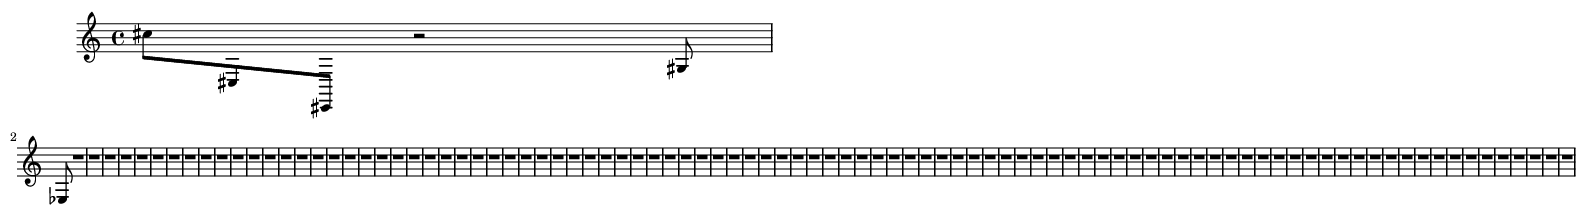


💾 MIDI file saved as: generated_music2.mid


In [14]:
# Convert the generated music to a music21 stream and display it
print("Converting generated music to musical notation...")

# Use only the newly generated part (after the seed sequence)
new_music = generated_music[sequence_length:]

try:
    generated_stream = chords_n_notes(new_music)
    print("Successfully created music stream!")
    
    # Display the sheet music
    print("\n🎼 Generated Sheet Music:")
    show(generated_stream)
    
    # Save as MIDI file
    midi_path = "generated_music2.mid"
    generated_stream.write('midi', fp=midi_path)
    print(f"\n💾 MIDI file saved as: {midi_path}")
    
except Exception as e:
    print(f"Error creating music stream: {e}")
    import traceback
    traceback.print_exc()